_LEARNING-CIRCLE-24 PROJECT_

<h2> Learning-Circle-24 </h2> <p>  Contributors </p>



# **Crime in Chicago**
The data dictionary can be found in [Chicago Crime Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data)

In this notebook, we are going to explore more about crime in Chicago and try to answer few questions:

How has crime in Chicago changed across years? What year was really the bloodiest year in two decades?
Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week than other types of crimes?

Analyzing the Chicago crime dataset involves examining various aspects of the data to understand patterns, trends, and characteristics of criminal activities in Chicago. We perform analysis using Python, pandas and visualization libraries using the following steps:

1. Load the Dataset: Load the Chicago crime dataset into a DataFrame.
2. Explore the Dataset: Examine the structure, columns, and basic statistics of the dataset.
3. Data Cleaning: We dropped redundant columns and handle missing values.
4. EDA: Exploratory Data Analysis
5. Feature Engineering: Create new column for Months, Day, Season
6. Frequency distribution of Crimes: show how the frequency of crime is distributed within Months, Days, Seasons.
7. Visualize Data Distribution: Visualize the distribution of variables using histograms, box plots, or density plots.
8. Investigate Relationships: Look for relationships between variables using scatter plots, correlation matrices, or pair plots
9. Investigate Crime Types: Analyze the distribution of different types of crimes.
10. Examine Crime Locations: Investigate the distribution of crimes across different locations.
11. Identify Hotspots: Identify areas with high crime rates.
12. Detect Seasonal Patterns: Look for seasonal patterns or variations in crime rates.
13. Compare Crime Rates: Compare crime rates across different categories such as day of the week, time of day, and month.
14. Summarize and Visualize Insights: Summarize and Visualize the key insights and findings from the analysis using plots and charts.

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Set display option 
pd.set_option('display.max.columns', None)

In [27]:
pwd

'C:\\Users\\Windows 10\\Documents\\Learning-Circle-24'

# 1. Loading the dataset

In [28]:
# Load the dataset
chicago_crime_df= pd.read_csv('chicago1.csv')

# 2. Explore the dataset

In [29]:
#checking the dimensions
chicago_crime_df.shape

(1000, 23)

In [30]:
# Display the first five rows of the dataset
chicago_crime_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [31]:
chicago_crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [32]:
 # Display column information and data types
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Case Number           1000 non-null   object 
 3   Date                  1000 non-null   object 
 4   Block                 1000 non-null   object 
 5   IUCR                  1000 non-null   object 
 6   Primary Type          1000 non-null   object 
 7   Description           1000 non-null   object 
 8   Location Description  999 non-null    object 
 9   Arrest                1000 non-null   bool   
 10  Domestic              1000 non-null   bool   
 11  Beat                  1000 non-null   int64  
 12  District              1000 non-null   float64
 13  Ward                  919 non-null    float64
 14  Community Area        919 non-null    float64
 15  FBI Code              

In [33]:
# checking missing value count
chicago_crime_df.isnull().sum()

Unnamed: 0               0
ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     1
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    81
Community Area          81
FBI Code                 0
X Coordinate             8
Y Coordinate             8
Year                     0
Updated On               0
Latitude                 8
Longitude                8
Location                 8
dtype: int64

In [34]:
chicago_crime_df.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,1000.000000,1.000000e+03,1000.000000,1000.000000,919.000000,919.000000,9.920000e+02,9.920000e+02,1000.000000,992.000000,992.000000
mean,499.500000,6.914198e+06,1178.557000,11.202000,22.705114,36.949946,1.164215e+06,1.886010e+06,2009.774000,41.842815,-87.672911
std,288.819436,3.511735e+06,691.469054,6.876226,13.714212,20.878936,1.660808e+04,3.087987e+04,6.203016,0.084946,0.060434
min,0.000000,2.005400e+04,111.000000,1.000000,1.000000,1.000000,1.100658e+06,1.815355e+06,2001.000000,41.648599,-87.905227
25%,249.750000,3.698168e+06,614.000000,6.000000,10.000000,23.000000,1.152368e+06,1.859896e+06,2004.000000,41.770739,-87.715795
50%,499.500000,6.854410e+06,1111.000000,10.000000,22.000000,32.000000,1.165374e+06,1.890540e+06,2009.000000,41.855455,-87.668667
75%,749.250000,1.020281e+07,1722.250000,17.000000,34.000000,53.000000,1.176446e+06,1.909066e+06,2015.000000,41.906502,-87.628120
max,999.000000,1.277362e+07,2535.000000,31.000000,50.000000,77.000000,1.204456e+06,1.951493e+06,2022.000000,42.022522,-87.526993


# 3. Data Preprocessing

## Data Cleaning

Here are some steps that we would carry out in this exercise

1. Convert data types to the appropriate formats
2. Remove redundant or unnecessary columns
3. Handle missing values

__Reasons for dropping the below columns__
- 'Unnamed: 0': Its just an index for individual row
- 'Case Number': Unique case identifier for the record which is redundant due to the presence of an automatically genrated 'ID'
- 'Location': This is where the incident occurred in a format that allows for creation of maps and other geographic operation. It's the combination of both latitude and longitude feature of this dataset thus, not required.
- 'Updated On': Holds the date and time the record was last updated.Which is not required for our analysis.
- 'X Coordinate': The x coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Y Coordinate': The y coordinate is a shifted location from the actual location for partial redaction but falls on the same block. Since we have a longitude/latitude and the block where the crime happened, we can neglect this feature.
- 'Community Area': This indicates the community area where the incident occurred. Which is not neccessary for our analysis.
- 'IUCR': This is the Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description, it provides information about the primary type and description of crime. Since primary type and description features already exist, it becomes a redundant column
- Description: It's simply a subcategory of the primary type(which describes the type of crime committed). this can be omitted
- Block: Since we have the latitude and longitude, this column is redundant.
- Community Area: This is not needed in our analysis and the presence of a police Beat makes this redundant. 
- FBI Code: Removed because it is not necessary for our analysis as we are unable to de-code these codes.

__1. convert inappropriate data types to the correct one__

In [35]:
# first we convert the date column to datetime data type.

chicago_crime_df['Date'] = pd.to_datetime(chicago_crime_df['Date'],format = "%m/%d/%Y %I:%M:%S %p")

In [36]:
# Convert the year column to object or string.

chicago_crime_df['Year'] = pd.Series(chicago_crime_df['Year'], dtype="string")

In [37]:
# Convert the ID column to an object or string as this is a unique identifier that cannot be quantified

chicago_crime_df['ID'] = pd.Series(chicago_crime_df['ID'], dtype="string")


In [38]:
# convert the district column to a string; from the keynote, Chicago police has only 22 district and the data type is plain text

chicago_crime_df['District'] = pd.Series(chicago_crime_df['District'], dtype='string')

In [39]:
chicago_crime_df['Domestic'].value_counts()

Domestic
False    853
True     147
Name: count, dtype: int64

__2. Use a funtion to Drop redundant columns and/or columns that are not necessary for our analysis (a redundant column is one that gives infomation that another column already explains: eg ID and Case number)__

In [40]:
chicago_crime_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [41]:
# Dropping redundant columns
def drop_redundant_columns(df):
    redundant_columns = ['Unnamed: 0','Case Number', 'Location','Updated On', 'FBI Code', 'Block', 'Description', 'X Coordinate','Y Coordinate','Community Area','IUCR']
    df.drop(redundant_columns, axis=1, inplace= True)
    
drop_redundant_columns(chicago_crime_df)

In [42]:
chicago_crime_df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
0,6407111,2008-07-26 14:30:00,CRIMINAL DAMAGE,STREET,False,False,423,4.0,10.0,2008,41.739980,-87.555120
1,11398199,2018-07-31 10:57:00,WEAPONS VIOLATION,POOL ROOM,True,False,413,4.0,8.0,2018,41.726922,-87.599747
2,5488785,2007-04-27 10:30:00,BURGLARY,RESIDENCE,True,False,1711,17.0,39.0,2007,41.994138,-87.734959
3,11389116,2018-07-23 08:55:00,ASSAULT,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,2018,41.881217,-87.730590
4,12420431,2021-07-11 06:40:00,ASSAULT,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,2021,41.874174,-87.668082


In [43]:
#Gloria

In [44]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    1000 non-null   string        
 1   Date                  1000 non-null   datetime64[ns]
 2   Primary Type          1000 non-null   object        
 3   Location Description  999 non-null    object        
 4   Arrest                1000 non-null   bool          
 5   Domestic              1000 non-null   bool          
 6   Beat                  1000 non-null   int64         
 7   District              1000 non-null   string        
 8   Ward                  919 non-null    float64       
 9   Year                  1000 non-null   string        
 10  Latitude              992 non-null    float64       
 11  Longitude             992 non-null    float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(2), string(3)
mem

In [45]:
pd.__version__

'2.1.4'

In [46]:
# A summary statistics of each column
chicago_crime_df.describe(include='all')

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
count,1000,1000,1000,999,1000,1000,1000.000000,1000,919.000000,1000,992.000000,992.000000
unique,1000,NaN,23,66,2,2,NaN,23,NaN,22,NaN,NaN
top,6407111,NaN,BATTERY,STREET,False,False,NaN,4.0,NaN,2005,NaN,NaN
freq,1,NaN,196,251,717,853,NaN,66,NaN,79,NaN,NaN
mean,NaN,2010-04-10 03:30:43.880000,NaN,NaN,NaN,NaN,1178.557000,NaN,22.705114,NaN,41.842815,-87.672911
min,NaN,2001-01-04 18:06:00,NaN,NaN,NaN,NaN,111.000000,NaN,1.000000,NaN,41.648599,-87.905227
25%,NaN,2004-12-19 17:02:04.500000,NaN,NaN,NaN,NaN,614.000000,NaN,10.000000,NaN,41.770739,-87.715795
50%,NaN,2009-04-27 01:12:17,NaN,NaN,NaN,NaN,1111.000000,NaN,22.000000,NaN,41.855455,-87.668667
75%,NaN,2015-08-24 13:30:45,NaN,NaN,NaN,NaN,1722.250000,NaN,34.000000,NaN,41.906502,-87.628120
max,NaN,2022-07-25 13:57:00,NaN,NaN,NaN,NaN,2535.000000,NaN,50.000000,NaN,42.022522,-87.526993


i have removed `datetime_is_numeric=True` because the parameter is not supported in the new version of pandas i'm using. This parameter was introduced in pandas version 1.3.0, but it seems that it's not available in the current version 2.2.1.

In [47]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    1000 non-null   string        
 1   Date                  1000 non-null   datetime64[ns]
 2   Primary Type          1000 non-null   object        
 3   Location Description  999 non-null    object        
 4   Arrest                1000 non-null   bool          
 5   Domestic              1000 non-null   bool          
 6   Beat                  1000 non-null   int64         
 7   District              1000 non-null   string        
 8   Ward                  919 non-null    float64       
 9   Year                  1000 non-null   string        
 10  Latitude              992 non-null    float64       
 11  Longitude             992 non-null    float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(2), string(3)
mem

__3. Handling missing values__

In [48]:
# checking missing value count
chicago_crime_df.isnull().sum()

ID                       0
Date                     0
Primary Type             0
Location Description     1
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    81
Year                     0
Latitude                 8
Longitude                8
dtype: int64

In [49]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [50]:
missing_values_table(chicago_crime_df)

Your selected dataframe has 12 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Ward,81,8.1
Latitude,8,0.8
Longitude,8,0.8
Location Description,1,0.1


- __Handling Missing values for the District Column__

We have just 12 missing value for the district column which is 0.0% of the entire dataset. We can decide to drop the row where location discription is missing or fill this row with the most crime location.

In [51]:
# dropping the missing district column null value
chicago_crime_df.dropna(subset=['District'],inplace=True) # i chose to drop this because the percentage NA is insignificant

In [52]:
chicago_crime_df.District.unique()

<StringArray>
[ '4.0', '17.0', '11.0', '12.0',  '2.0', '15.0', '25.0', '14.0',  '8.0',
  '6.0', '19.0',  '1.0',  '7.0', '20.0', '18.0',  '3.0',  '9.0', '22.0',
  '5.0', '16.0', '10.0', '24.0', '31.0']
Length: 23, dtype: string

In [53]:
chicago_crime_df.isna().sum()

ID                       0
Date                     0
Primary Type             0
Location Description     1
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    81
Year                     0
Latitude                 8
Longitude                8
dtype: int64

- __Handling Missing values for the ward Column__

In [54]:
chicago_crime_df.Ward.unique()

array([10.,  8., 39., 28., 27., nan, 29., 37., 26., 35., 14.,  1., 17.,
        3., 44., 36.,  4.,  2.,  6.,  7., 40., 42., 20., 13., 11., 34.,
       47., 33.,  9., 21., 45., 25., 24., 15., 16., 19., 43., 30., 23.,
       32., 31., 22., 50., 49.,  5., 46., 12., 41., 38., 18., 48.])

In [55]:
# Using the mode to fill up the most common Ward, then replace it with the current Ward column
most_fq_ward = chicago_crime_df.Ward.mode()[0] # indexing the mode to get the value as it returns a series
chicago_crime_df.Ward = chicago_crime_df.Ward.fillna(most_fq_ward)

In [56]:
chicago_crime_df.isna().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    1
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Year                    0
Latitude                8
Longitude               8
dtype: int64

- __Handling Missing values for the latitude and Longitude Column__ (Using Assosciation and forward fill) <br>
    
The assumption here is that the latitude and longitude readings are points that show exact location, are closer to each other within a district. If they are, we can group our data by districts and fill up missing Latitide and longitude values by using median or mode.

In [57]:
chicago_crime_df.groupby(['District', 'Longitude', 'Latitude']).size()

District  Longitude   Latitude 
1.0       -87.643130  41.867207    1
          -87.642757  41.885182    1
          -87.639235  41.868542    1
          -87.639087  41.862218    1
          -87.635403  41.885368    1
                                  ..
9.0       -87.634564  41.808299    1
          -87.633473  41.799985    1
          -87.633067  41.797178    1
          -87.631969  41.850756    1
          -87.630915  41.852868    1
Length: 982, dtype: int64

There appears to be closeness in Latitude points when data is grouped based on districts, we can group based on district and fill up by taking the median.

In [58]:
chicago_crime_df['Latitude'] = chicago_crime_df.groupby('District')['Latitude'].transform(lambda x: x.fillna(x.median()))
chicago_crime_df['Longitude'] = chicago_crime_df.groupby('District')['Longitude'].transform(lambda x: x.fillna(x.median()))

In [59]:
chicago_crime_df.isna().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    1
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Year                    0
Latitude                0
Longitude               0
dtype: int64

- __Handling Missing values for the Location Description__

We have just 2877 missing value for the location description which is 0.1% of the entire dataset. We can decide to drop the row where location decription is missing or fill this row with the most crime location.

In [60]:
chicago_crime_df.groupby(['District','Location Description']).size()

District  Location Description        
1.0       APARTMENT                        1
          BAR OR TAVERN                    1
          CHA APARTMENT                    2
          CHA PARKING LOT/GROUNDS          4
          COMMERCIAL / BUSINESS OFFICE     2
                                          ..
9.0       SCHOOL, PUBLIC, BUILDING         1
          SIDEWALK                         3
          SPORTS ARENA/STADIUM             1
          STREET                          20
          VEHICLE NON-COMMERCIAL           1
Length: 346, dtype: int64

In [61]:
# dropping the missing location description index row
chicago_crime_df.dropna(subset=['Location Description'],inplace=True) 

In [62]:
chicago_crime_df.isna().sum()

ID                      0
Date                    0
Primary Type            0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Year                    0
Latitude                0
Longitude               0
dtype: int64

# EDA: Data Exploration

In [63]:
# Try to find the correlation of the columns 

In [64]:
chicago_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    999 non-null    string        
 1   Date                  999 non-null    datetime64[ns]
 2   Primary Type          999 non-null    object        
 3   Location Description  999 non-null    object        
 4   Arrest                999 non-null    bool          
 5   Domestic              999 non-null    bool          
 6   Beat                  999 non-null    int64         
 7   District              999 non-null    string        
 8   Ward                  999 non-null    float64       
 9   Year                  999 non-null    string        
 10  Latitude              999 non-null    float64       
 11  Longitude             999 non-null    float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(2), string(3)
memory us

In [65]:
# Select only numeric columns
numeric_columns = chicago_crime_df.select_dtypes(include=['number'])

# Calculate correlation
numeric_columns.corr()

,Beat,Ward,Latitude,Longitude
Beat,1.000000,0.601617,0.615022,-0.543751
Ward,0.601617,1.000000,0.617456,-0.470008
Latitude,0.615022,0.617456,1.000000,-0.588598
Longitude,-0.543751,-0.470008,-0.588598,1.000000


Text(0.5, 1.0, 'Chicago Crime Correlation')

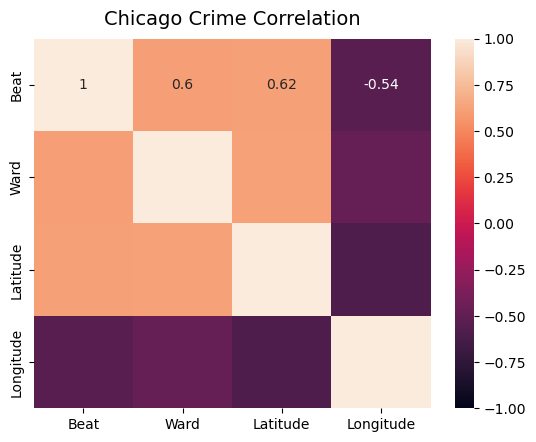

In [66]:
#plot a heatmap showing correlation
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, annot=True)
heatmap.set_title('Chicago Crime Correlation', fontdict={'fontsize':14}, pad=10)

**_Observation_**
1. There is a negative correlation between Arrest, Domestic crime(i.e if the arrest was local or not) and the beats or ward
2. The Beat and Ward are positively correlated.

In [67]:
chicago_crime_df.groupby(['Primary Type', 'Arrest','Domestic']).size().sort_values(ascending=False).reset_index().rename(columns={0:'Crime Count'})

,Primary Type,Arrest,Domestic,Crime Count
0,THEFT,False,False,165
1,NARCOTICS,True,False,120
2,CRIMINAL DAMAGE,False,False,89
3,BATTERY,False,False,84
4,BATTERY,False,True,72
5,BURGLARY,False,False,58
6,ASSAULT,False,False,41
7,MOTOR VEHICLE THEFT,False,False,41
8,ROBBERY,False,False,37
9,DECEPTIVE PRACTICE,False,False,34


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

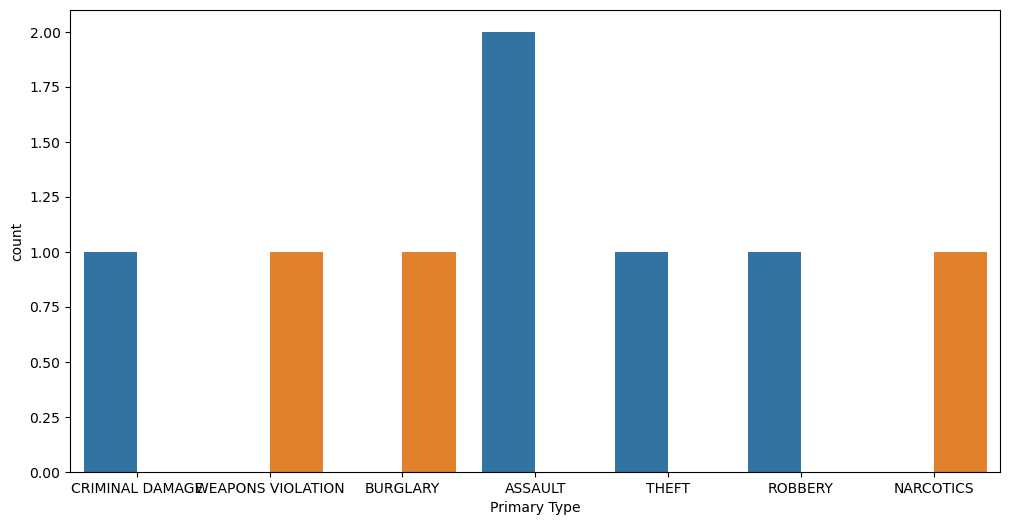

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Primary Type', hue='Arrest', data=chicago_crime_df[:8])

# 4. Feature Engineering

Create new columns for Months, Day, and Season

__Creating month column__

In [69]:
# Create new columns for Months
def extract_and_map_month(date):
    # Ensure Date column have been converted to datetime format
    month_names = chicago_crime_df['Date'].dt.month_name()
# dt is an attribute of the date column object
# month_name() is a method
    return month_names

In [70]:
chicago_crime_df['Month'] = extract_and_map_month(chicago_crime_df['Date'])

__Creating Day Column__

In [71]:
# Create new columns for Day
def extract_and_map_month(date):
    # ensure the input is in datetime format
    day_names = chicago_crime_df['Date'].dt.day_name()
# dt is an attribute of the date column object
# month_name() is a method
    return day_names

In [72]:
chicago_crime_df['Day'] = extract_and_map_month(chicago_crime_df['Date'])

__Creating Seasons column__

In [73]:
# Function to define various month and their corresponding season
def get_season(month):
    if month in ['December','January','February']:
        return 'Winter'
    elif month in ['March','April','May']:
        return 'Spring'
    elif month in ['June','July','August']:
        return 'Summer'
    else:
        return 'Fall'

In [74]:
chicago_crime_df['Season'] = chicago_crime_df['Month'].apply(get_season)

In [75]:
chicago_crime_df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Month,Day,Season
0,6407111,2008-07-26 14:30:00,CRIMINAL DAMAGE,STREET,False,False,423,4.0,10.0,2008,41.739980,-87.555120,July,Saturday,Summer
1,11398199,2018-07-31 10:57:00,WEAPONS VIOLATION,POOL ROOM,True,False,413,4.0,8.0,2018,41.726922,-87.599747,July,Tuesday,Summer
2,5488785,2007-04-27 10:30:00,BURGLARY,RESIDENCE,True,False,1711,17.0,39.0,2007,41.994138,-87.734959,April,Friday,Spring
3,11389116,2018-07-23 08:55:00,ASSAULT,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,2018,41.881217,-87.730590,July,Monday,Summer
4,12420431,2021-07-11 06:40:00,ASSAULT,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,2021,41.874174,-87.668082,July,Sunday,Summer


# 5. Frequency Distribution of Crimes

 __Monthly Crime Frequency__

In [76]:
# created another df where the Date would be the Index
crimes_df = chicago_crime_df.set_index(['Date'])

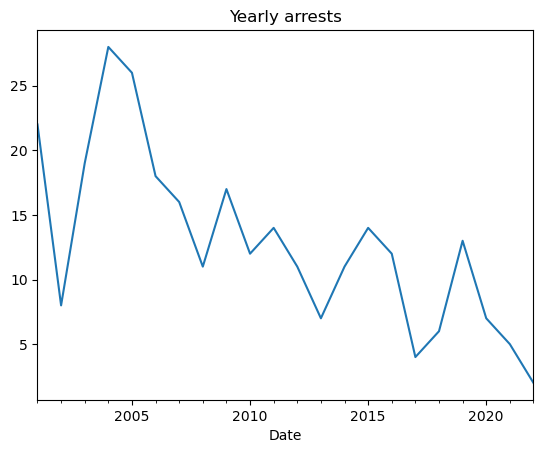

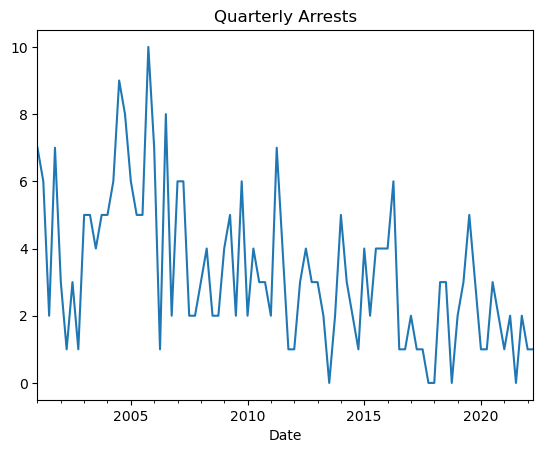

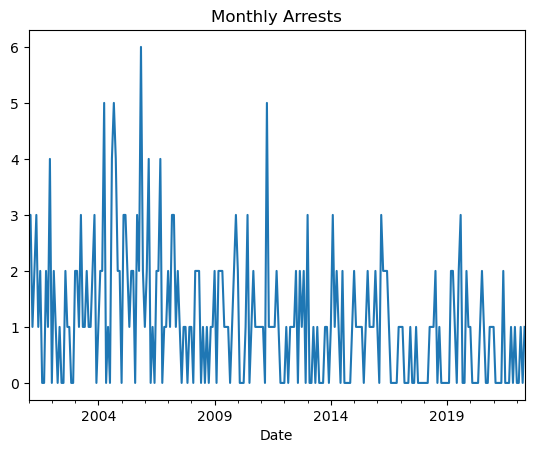

In [77]:
# show a trend analysis of arrest over years, months and days
plt.subplot()
#plt.figure(figsize=(8, 6))

# this gives us data where arrest was made
arrests = crimes_df[crimes_df['Arrest'] == True]['Arrest']

#yearly arrest 
arrests.resample('A').count().plot() #the 'A' is an offset Data that indicates annual, view documentation for further understanding
plt.title('Yearly arrests')
plt.show()

# quarter start arrest
arrests.resample('QS').count().plot() 
plt.title('Quarterly Arrests')
plt.show()

# monthly arrest
arrests.resample('M').count().plot() 
plt.title('Monthly Arrests')
plt.show()



__Observation__
1. There is a downward trend of arrest over the years from 2008 upwards this is evident even in the quarterly arrests.
2. 2020 recorded the least monthl arrest.

In [78]:
crime_count_by_month = chicago_crime_df.groupby('Month')['Arrest'].count()
print(crime_count_by_month)

Month
April        101
August        79
December      76
February      68
January       86
July          91
June          81
March         84
May           79
November      74
October       97
September     83
Name: Arrest, dtype: int64


__Seasonal Crime Frequency__

In [79]:
crime_count_by_season = chicago_crime_df.groupby('Season')['Season'].count()
crime_count_by_season

Season
Fall      254
Spring    264
Summer    251
Winter    230
Name: Season, dtype: int64

 __Daily Crime Frequency__

In [80]:
crime_count_per_day = chicago_crime_df.groupby('Day')['Day'].count()
print(crime_count_per_day)

Day
Friday       125
Monday       156
Saturday     152
Sunday       137
Thursday     150
Tuesday      145
Wednesday    134
Name: Day, dtype: int64


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

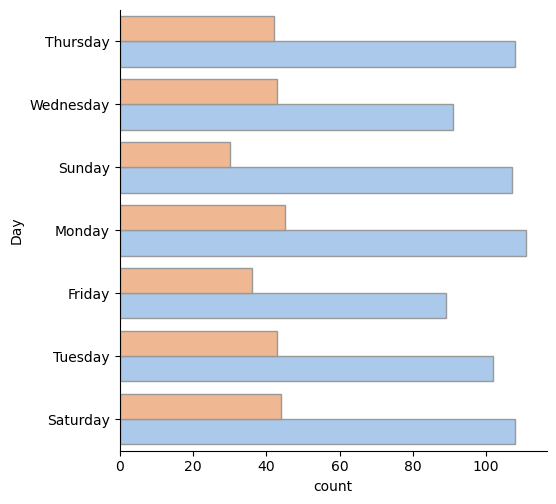

In [97]:
# Frequency of arrests for each day

sns.catplot(
    data=chicago_crime_df, y="Day", hue="Arrest", kind="count",
    palette="pastel", legend=True, edgecolor=".6",
)

In [84]:
#Location with the most crime

chicago_crime_df.groupby('Location Description')['Primary Type'].size().sort_values(ascending=False).head(20)

Location Description
STREET                            251
RESIDENCE                         169
APARTMENT                         113
SIDEWALK                           98
PARKING LOT/GARAGE(NON.RESID.)     31
ALLEY                              30
OTHER                              28
RESTAURANT                         19
SCHOOL, PUBLIC, BUILDING           19
RESIDENCE PORCH/HALLWAY            16
GROCERY FOOD STORE                 16
SMALL RETAIL STORE                 15
DEPARTMENT STORE                   14
VEHICLE NON-COMMERCIAL             13
RESIDENCE-GARAGE                   11
CHA PARKING LOT/GROUNDS            11
COMMERCIAL / BUSINESS OFFICE       10
GAS STATION                        10
CTA PLATFORM                        8
RESIDENTIAL YARD (FRONT/BACK)       7
Name: Primary Type, dtype: int64

# 6. Visualize Data Distribution

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Distribution of Crime Types')

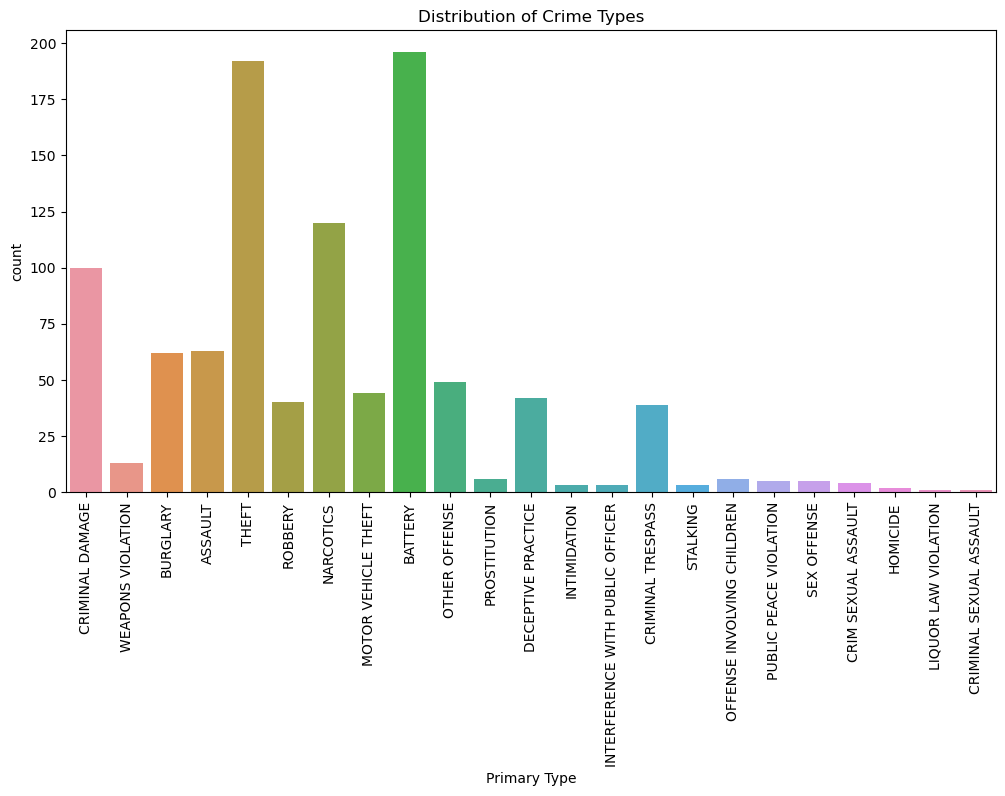

In [86]:
# Visualize the distribution of crime types
plt.figure(figsize=(12, 6))
sns.countplot(data=chicago_crime_df, x='Primary Type')
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')

# 6. Investigate Relationships

In [87]:
numeric_columns.corr()

,Beat,Ward,Latitude,Longitude
Beat,1.000000,0.601617,0.615022,-0.543751
Ward,0.601617,1.000000,0.617456,-0.470008
Latitude,0.615022,0.617456,1.000000,-0.588598
Longitude,-0.543751,-0.470008,-0.588598,1.000000


Text(0.5, 1.0, 'Chicago Crime Correlation')

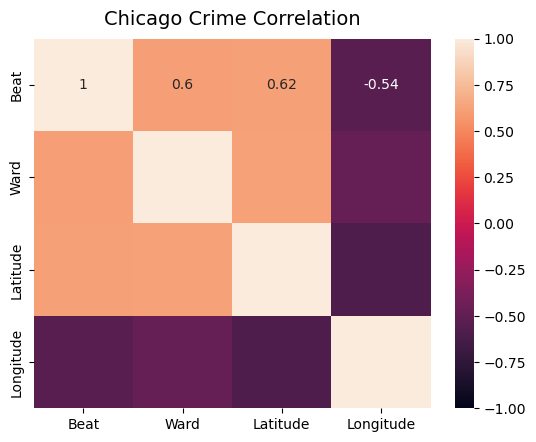

In [88]:
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, annot=True)
heatmap.set_title('Chicago Crime Correlation', fontdict={'fontsize':14}, pad=10)

# i can infer the relationship between the districts and the ward

Text(0, 0.5, 'Latitude')

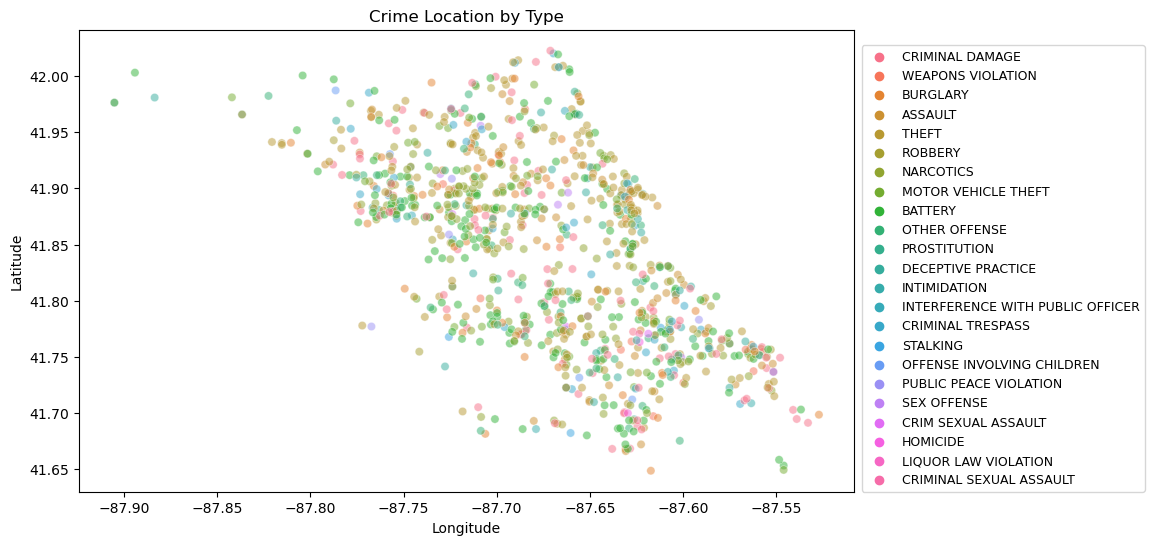

In [93]:
# Investigate Relationships
# Explore the relationship between crime location and crime type
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chicago_crime_df, x='Longitude', y='Latitude', hue='Primary Type', alpha=0.5)
plt.title('Crime Location by Type')
plt.legend(loc=(1.01,0), fontsize =9)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 7. Investigate Crime Types

Text(0.5, 1.0, 'Crime Type')

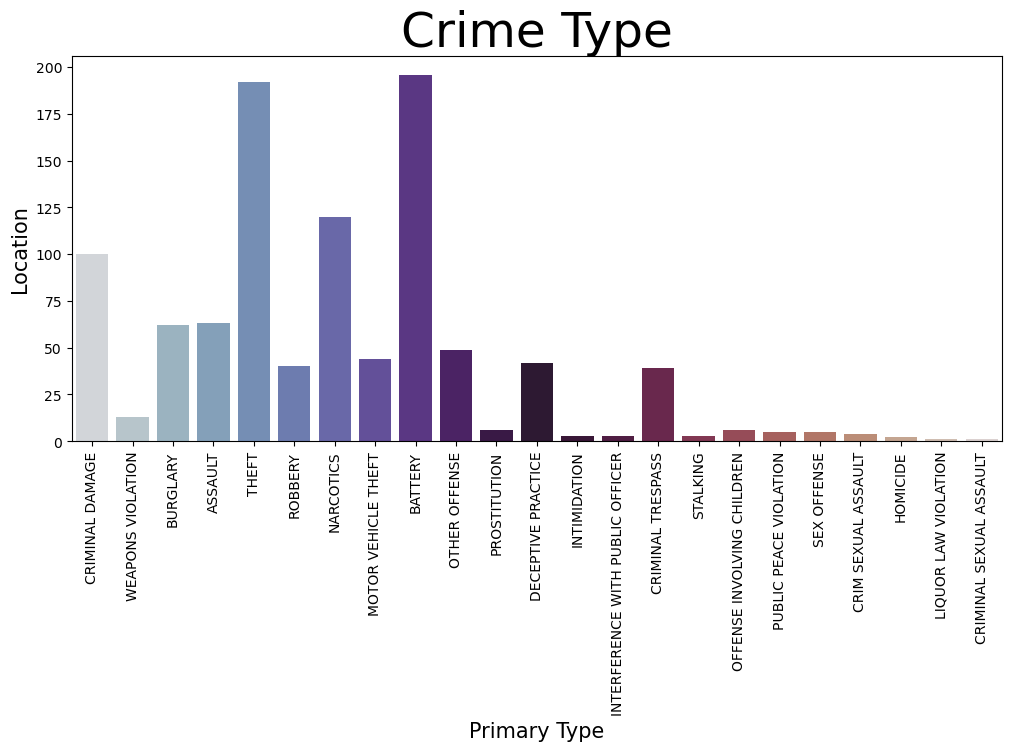

In [123]:
# investigate crime types 
# A countplot visualization of the the crime types
plt.figure(figsize=(12,5))
sns.countplot(data=chicago_crime_df, x='Primary Type', palette ='twilight')
plt.xlabel('Primary Type',size = 15)
plt.ylabel('Location',size=15)
plt.xticks(size=10,rotation=90)
plt.yticks(size=10)
plt.title('Crime Type',size=35)

Text(0, 0.5, 'Latitude')

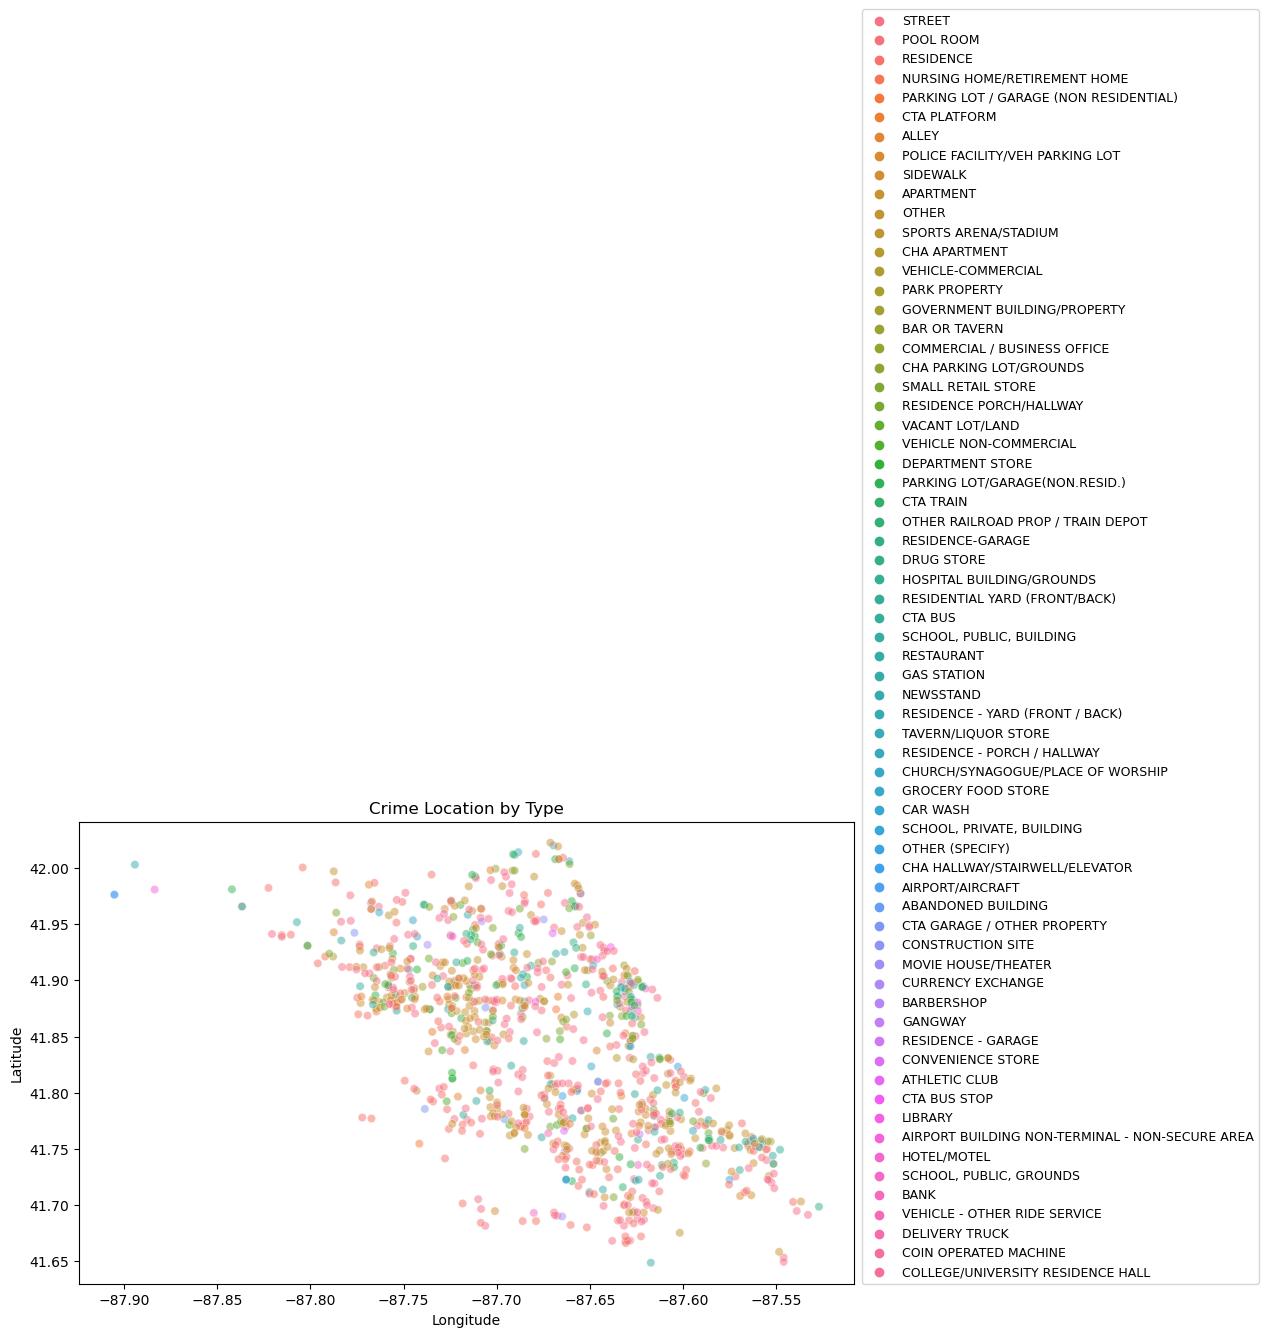

In [125]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=chicago_crime_df, x='Longitude', y='Latitude', hue='Location Description', alpha=0.5)
plt.title('Crime Location by Type')
plt.legend(loc=(1.01,0), fontsize =9)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 8. Examine Crime Locations

# 9. Identify Hotspots

# 10. Detect Seasonal Patterns

# 11. Compare Crime Rates

# 12. Summarize and Visualize Insights